# Reporte escrito 2

In [ ]:
# Instala dependencias
!wget https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/INEE/BaseReporte2.sav
!pip install pingouin
!pip install pyreadstat

En las respuestas deben indicar:

- Hipótesis de trabajo e hipótesis estadísticas, de manera correspondiente.
- Resultados de prueba de normalidad para las distribuciones de las variables de estudio.
- Indicadores estadísticos utilizados (SW, F, r, R2 B, ß) así como el valor p correspondiente, y la magnitud según criterios de Cohen, de ser pertinente.
- Redacción de las conclusiones.

## Pregunta 1

La literatura sobre el desarrollo humano temprano indica que la **autoeficacia parental** y la **insatisfacción marital** constituyen factores que predicen el **compromiso paterno** en la crianza en la niñez. Un grupo de investigación llevó a cabo un estudio para conocer si ambos factores estiman el compromiso reportado por papás en la región Loreto (10 pts).

a) Escribe la hipótesis de trabajo (HT) así como las hipótesis estadísticas (H0 y H1) correspondientes a cada variable predictora del modelo a analizar.

b) Plantea la ecuación del modelo para la HT. 

c) Evalúa los supuestos necesarios para continuar con el análisis de regresión.
- Linealidad
- Normalidad de residuos
- Multicolinealidad

d) Evalúa el ajuste del modelo planteado y presenta el coeficiente de determinación de acuerdo con la variabilidad explicada del compromiso paterno y a su magnitud.

e) Indica si se cumplen las hipótesis para cada una de las variables consideradas por el grupo de investigación y redacta tu conclusión.

f) Finalmente, identifica cuál es la variable más importante en el modelo, de ser pertinente.



In [1]:
import pandas as pd

df = pd.read_spss("BaseReporte2.sav")
df

,Código,Edad,AutoeficaciaP,Insatisfacción,Conservadurismo,CompromisoP
0,001,25.0,16.0,25.0,9.0,37.0
1,002,38.0,18.0,17.0,6.0,42.0
2,003,28.0,19.0,16.0,10.0,35.0
3,004,32.0,24.0,23.0,10.0,76.0
4,005,26.0,22.0,21.0,11.0,39.0
...,...,...,...,...,...,...
95,096,37.0,18.0,19.0,8.0,43.0
96,097,48.0,26.0,21.0,10.0,65.0
97,098,35.0,19.0,26.0,12.0,50.0
98,099,30.0,17.0,27.0,14.0,30.0


### Solución

HT: La autoeficacia parental y la insatisfacción marital predicen el compromiso paterno en la crianza en papás de Loreto.

$H_{0}$: $β_{autoeficacia} = 0$, $β_{insatisfacción} = 0$, autoeficacia e insatisfacción no predicen el compromiso paterno.

$H_{1}$: $β_{autoeficacia} \neq 0$, $β_{insatisfacción} ≠ 0$, autoeficacia e insatisfacción predicen el compromiso paterno.

$Compromiso \ paterno = β_{0} + β_{1}(autoeficacia \ parental) + β_{2}(insatisfacción \ marital) \pm \epsilon$, con $β_{1} \neq 0$, $β_{2} \neq 0$

- Linealidad

In [2]:
import pingouin as pg

pg.normality(df[["AutoeficaciaP", "Insatisfacción", "CompromisoP"]])

,W,pval,normal
AutoeficaciaP,0.980055,0.134252,True
Insatisfacción,0.976582,0.071790,True
CompromisoP,0.983924,0.264967,True


De acuerdo con los resultados de la prueba Shapiro-Wilk, todas las variables presentaron distribución normal: autoeficacia parental, SW =.98, p =.13, insatisfacción marital, SW =.98, p =.07, y compromiso paterno, SW =.98, p=.27. Por ello, se utilizó el análisis de correlación de Pearson.

In [7]:
pg.pairwise_corr(
    columns=["AutoeficaciaP", "Insatisfacción", "CompromisoP"],
    method="pearson",
    data=df,
    alternative="two-sided",
)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,AutoeficaciaP,Insatisfacción,pearson,two-sided,100,-0.451152,"[-0.59, -0.28]",2.468186e-06,6998.055,0.997808
1,AutoeficaciaP,CompromisoP,pearson,two-sided,100,0.698190,"[0.58, 0.79]",6.808635e-16,1.096e+13,1.000000
2,Insatisfacción,CompromisoP,pearson,two-sided,100,-0.641368,"[-0.74, -0.51]",6.530957e-13,1.419e+10,1.000000


Se encontró una asociación directa significativa entre autoeficacia parental y compromiso paterno r(98) = .70, p<.001, con una magnitud grande, según los criterios de Cohen. Por otro lado, existe una asociación inversa y grande entre insatisfacción marital y compromiso paterno, r(98) = -.64, p<.001. 

Así, se cumple con el supuesto de linealidad y se continuará con los siguientes supuestos y el análisis de regresión múltiple.

- Multicolinealidad

In [8]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm

# Fit regression model
model = smf.ols("CompromisoP ~ AutoeficaciaP + Insatisfacción", data=df).fit()

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = model.model.exog

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = model.params.index

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(X, i) for i in range(model.model.exog.shape[1])
]
vif_data

,feature,VIF
0,Intercept,125.865924
1,AutoeficaciaP,1.255552
2,Insatisfacción,1.255552


Autoeficacia parental:        Tolerancia = .80 > .20, VIF = 1.26 < 3

Insatisfacción marital:        Tolerancia = .80 > .20, VIF = 1.26 < 3

Los resultados sugieren que las variables predictoras de autoeficacia parental e insatisfacción marital no tienen una relación lineal entre sí, por lo que se cumple con el supuesto de independencia de variables.

- Normalidad de los residuos

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

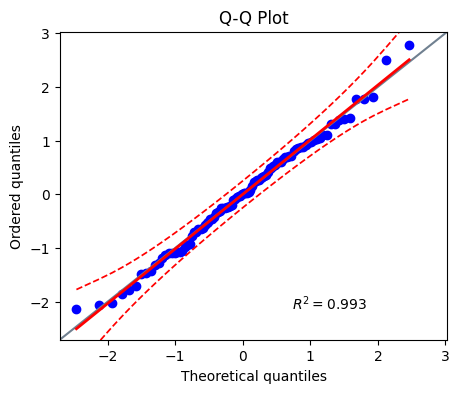

In [11]:
pg.qqplot(model.resid)

In [10]:
pg.normality(model.resid)

,W,pval,normal
0,0.991742,0.802206,True


La prueba de Shapiro-Wilk fue de SW =.99, p =.80, por lo que los residuos presentan distribución normal.

En función a los supuestos evaluados, se realizará un análisis de regresión lineal múltiple con dos variables predictoras, autoeficacia parental e insatisfacción marital, para estimar el compromiso paterno de papás de Loreto.

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            CompromisoP   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     79.54
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           3.57e-21
Time:                        20:24:45   Log-Likelihood:                -356.35
No. Observations:                 100   AIC:                             718.7
Df Residuals:                      97   BIC:                             726.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         41.2657      9.726      4.243      0.000      21.962      60.570
AutoeficaciaP      1.9092      0.260      7.331      0.000       1.392       2.426
Insatisfacción    -1.5142      0.259     -5.852      0.000      -2.028      -1.001
==============================================================================
Omnibus:                        0.137   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.934   Jarque-Bera (JB):                0.245
Skew:                           0.082   Prob(JB):                        0.885
Kurtosis:                       2.821   Cond. No.                         349.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El resultado de la prueba de ANOVA fue de F(2, 97)=79.54, p<.001, por lo que el modelo es adecuado para estimar el compromiso paterno. 

Además, el R2 ajustado fue .613 por lo que se puede decir que el 61.3% de la variación que se observa en el compromiso paterno se explica por la autoeficacia parental y la insatisfacción marital. Según el criterio de Cohen (1988) el coeficiente de determinación es grande.

El análisis de regresión lineal múltiple indica que el $β_{0}=41.27$, $β_{autoeficacia}= 1.91$, $p<.001$ y $β_{insatisfacción}= -1.51$, $p<.001$. 

En el caso de la autoeficacia parental se encontró que predice el compromiso paterno de manera directa y significativa, es decir, a cada incremento de una unidad en autoeficacia se observa un aumento de 1.91 en compromiso paterno. 

Por su parte, la insatisfacción marital predice el compromiso de manera inversa y significativa; por cada unidad de insatisfacción se estima una disminución del compromiso en 1.51. 

Por todo ello se concluye que la HT se cumple y que ambas variables son factores que predicen significativamente el compromiso paterno en papás de Loreto.

$Compromiso \ paterno = 41.27 + 1.91 (autoeficacia) – 1.51 (insatisfacción) \pm 8.67$

In [14]:
import numpy as np
from scipy import stats

model = smf.ols(
    "CompromisoP ~ AutoeficaciaP + Insatisfacción",
    data=df.select_dtypes(include=[np.number]).dropna().apply(stats.zscore),
).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            CompromisoP   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     79.54
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           3.57e-21
Time:                        20:29:38   Log-Likelihood:                -93.355
No. Observations:                 100   AIC:                             192.7
Df Residuals:                      97   BIC:                             200.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.492e-16      0.062   2.39e-15      1.000      -0.124       0.124
AutoeficaciaP      0.5133      0.070      7.331      0.000       0.374       0.652
Insatisfacción    -0.4098      0.070     -5.852      0.000      -0.549      -0.271
==============================================================================
Omnibus:                        0.137   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.934   Jarque-Bera (JB):                0.245
Skew:                           0.082   Prob(JB):                        0.885
Kurtosis:                       2.821   Cond. No.                         1.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En el modelo se observa que la autoeficacia parental es la variable predictora más importante en el modelo que la insatisfacción marital, $B_{autoeficacia} = .51 > B_{insatisfacción} = -.41$.

## Pregunta 2

De acuerdo con los resultados del modelo analizado previamente, si se cuenta con un participante que puntúa 27 en autoeficacia parental y 22 en insatisfacción, ¿cuánto sería el puntaje de compromiso paterno estimado? (2 pts)                 

### Solución

$Compromiso \ paterno = 41.27 + 1.91 (autoeficacia) – 1.51 (insatisfacción) \pm 8.67$

$Compromiso paterno = 59.62 \pm 8.67$

$Compromiso paterno = [50.95, 68.29]$

## Pregunta 3

En el mismo estudio, se evaluó si el conservadurismo era un factor de riesgo en el compromiso paterno en papás de preescolares. Para ello, se planteó conocer si el **conservadurismo** del padre contribuye a un menor **compromiso** en la crianza (8 pts).

a) Redacta la hipótesis de trabajo (HT) y las hipótesis estadísticas respectivas.

b) Plantea la ecuación del modelo para la HT. 

c) Analiza si existe evidencia de la asociación entre las variables con un gráfico de dispersión y reporta los resultados de la prueba de correlación pertinente.

d) Indica si el modelo presenta un buen ajuste, así como el coeficiente de determinación considerando su variabilidad y magnitud de acuerdo con los criterios de Cohen.

e) Reporta los resultados de los coeficientes del modelo e indica si se cumple la hipótesis del estudio, elaborando tu conclusión.

### Solución

HT: El conservadurismo predice un menor compromiso paterno en papás de preescolares en Loreto.

$H_{0}$: $β = 0$, el conservadurismo no predice el compromiso paterno.

$H_{1}$: $β < 0$, el conservadurismo predice un menor compromiso paterno.


$Compromiso \ paterno = β_{0} – β_{1} (conservadurismo) ± \epsilon$, $β < 0$

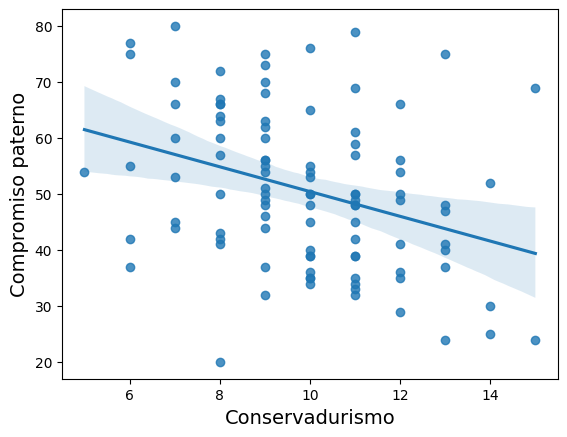

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.regplot(x="Conservadurismo", y="CompromisoP", data=df)
ax.set_xlabel("Conservadurismo", size=14)
ax.set_ylabel("Compromiso paterno", size=14)
plt.show()

En primer lugar, el diagrama de dispersión sugiere una ligera relación lineal inversa entre las variables debido a que la nube de puntos muestra que altos valores de conservadurismo corresponden con bajos valores de compromiso paterno, y viceversa.

In [17]:
pg.normality(df[["Conservadurismo", "CompromisoP"]])

,W,pval,normal
Conservadurismo,0.976677,0.073023,True
CompromisoP,0.983924,0.264967,True


Tanto conservadurismo, SW =.98, p=.07, como compromiso paterno, SW =.98, p=.27, cuentan con una distribución normal por lo que se utilizará el análsis de correlación de Pearson para corroborar la tendencia del gráfico de dispersión.

In [18]:
pg.pairwise_corr(
    columns=["Conservadurismo", "CompromisoP"],
    method="pearson",
    data=df,
    alternative="less",
)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Conservadurismo,CompromisoP,pearson,less,100,-0.339069,"[-1.0, -0.18]",0.000279,88.318,0.967808


Existe una asociación lineal inversa significativa y de magnitud mediana entre el conservadurismo y el compromiso paterno, r(98) = –.34, p < .001 (unilateral).

In [20]:
model = smf.ols("CompromisoP ~ Conservadurismo", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            CompromisoP   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     12.73
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           0.000559
Time:                        20:38:48   Log-Likelihood:                -398.79
No. Observations:                 100   AIC:                             801.6
Df Residuals:                      98   BIC:                             806.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          72.5371      6.263     11.581      0.000      60.108      84.967
Conservadurismo    -2.2112      0.620     -3.568      0.001      -3.441      -0.981
==============================================================================
Omnibus:                        1.268   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                1.349
Skew:                           0.240   Prob(JB):                        0.510
Kurtosis:                       2.696   Cond. No.                         48.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En cuanto al ajuste del modelo, el ANOVA sugiere que el modelo propuesto es pertinente para predecir cambios en el compromiso paterno, F(1, 98) = 12.73, p = .001.

Asimismo, se obtuvo un R2 de .115, de modo que el 11.5% de la variabilidad de compromiso paterno se explica por el conservadurismo. Según los criterios de Cohen (1988), el coeficiente de determinación es de magnitud mediana.

El análisis de regresión lineal simple muestra que $β_{0} = 72.54$, $β_{conservadurismo} = –2.21$, $p < .001$ (unilateral). 

El conservadurismo predice significativamente un menor compromiso paterno, $β = –2.21$, $EE_{β}=0.62$, $t(98) = –3.57$, $p <.001$, existiendo entre ambos una asociación inversa significativa con un tamaño del efecto mediano, $R^{2} = .115$, $F(1, 98)=12.73$, $p = .001$. 

Así, por cada unidad de conservadurismo, el compromiso paterno disminuye en 2.21. En conclusión, la evidencia estadística sugiere que el conservadurismo reduce el compromiso paterno en papás de preescolares en Loreto.

$Compromiso \ paterno = 72.54 – 2.21 (conservadurismo) \pm 13.18$